                                        Unit3 Individual Project 3
                                               Keang Cheang Ung
                                        Colorado Technical University


Questions: 
Which type product had the most complaints ordered by state?
How many complaints have been filed for each company?
Summarize the responses for each company. (i.e., 32 In Progress, 67 Closed, 22 Closed with Explanation).

In this report, this student used Python and Jupyter notebook to write the report, and answer the questions above. 

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv("Consumer_Complaints.csv")
data.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/09/2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,08872,NaN,Consent not provided,Web,08/09/2015,Closed with non-monetary relief,Yes,No,1509954
1,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759
2,08/19/2015,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94526,NaN,Consent not provided,Web,08/19/2015,Closed with explanation,Yes,No,1527601
3,03/04/2016,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03/04/2016,Closed with explanation,Yes,Yes,1816726
4,03/18/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",PA,175XX,NaN,NaN,Referral,03/19/2013,Closed with explanation,Yes,No,358304


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422618 entries, 0 to 1422617
Data columns (total 18 columns):
Date received                   1422618 non-null object
Product                         1422618 non-null object
Sub-product                     1187452 non-null object
Issue                           1422618 non-null object
Sub-issue                       873871 non-null object
Consumer complaint narrative    457289 non-null object
Company public response         522459 non-null object
Company                         1422618 non-null object
State                           1399308 non-null object
ZIP code                        1291569 non-null object
Tags                            194116 non-null object
Consumer consent provided?      819027 non-null object
Submitted via                   1422618 non-null object
Date sent to company            1422618 non-null object
Company response to consumer    1422617 non-null object
Timely response?                1422618 non-null obj

In [104]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [106]:
#change columns names
data.columns=['date_received', 'product', 'sub_product', 'issue', 'sub_issu', 'consumer_complaint_nar', 'company_pub_response', 'company', 'state', 'zip_code', 'tags', 'consumer_consent_provided', 'submitted_via', 'date_sent_to_com', 'com_response_to_consumer', 'timely_response', 'consumer_dis', 'complaint_id']

In [107]:
product_group= data.groupby(["state", "product"]).count()
product_group = product_group.sort_values(["state", "issue"], ascending=[True, False])
product_groupcsv = pd.DataFrame(product_group)
product_groupcsv.to_csv("product.csv", index=True)

In [112]:
#Q1: The product that had the most complaints sorted by the state are presented in detail in the product.csv file and briefly listed below: 
product_groupcsv.head(30)

170       167   
      Credit card                                             133       126   
      Bank account or service                                  90        87   
      Credit card or prepaid card                              79        69   

                                                          tags  \
state product                                                    
AA    Mortgage                                               3   
      Checking or savings account                            3   
      Credit reporting, credit repair services, or ot...     0   
      Student loan                                           1   
      Bank account or service                                1   
      Credit card                                            1   
      Debt collection                                        1   
      Credit card or prepaid card                            1   
AE    Mortgage                                              71   
      Debt collection                                       72   
      Credit reporting, credit repair services, or ot...    71   
      Credit reporting                                      39   
      Student loan                                          26   
      Credit card                                           24   
      Bank account or service                               18   
      Credit card or prepaid card                           18   
      Consumer Loan                                         14   
      Checking or savings account                            7   
      Money transfer, virtual currency, or money service     7   
      Vehicle loan or lease                                  6   
      Money transfers                                        1   
      Payday loan, title loan, or personal loan              4   
      Prepaid card                                           1   
AK    Debt collection                                      103   
      Mortgage                                              77   
      Credit reporting, credit repair services, or ot...    56   
      Credit reporting                                      52   
      Credit card                                           28   
      Bank account or service                               17   
      Credit card or prepaid card                           14   

                                                          consumer_consent_provided  \
state product                                                                         
AA    Mortgage                                                                    5   
      Checking or savings account                                                 3   
      Credit reporting, credit repair services, or ot...                          3   
      Student loan                                                                1   
      Bank account or service                                                     0   
      Credit card                                                                 1   
      Debt collection                                                             2   
      Credit card or prepaid card                                                 1   
AE    Mortgage                                                                   49   
      Debt collection                                                            56   
      Credit reporting, credit repair services, or ot...                         75   
      Credit reporting                                                           22   
      Student loan                                                               35   
      Credit card                                                                19   
      Bank account or service                                                    17   
      Credit card or prepaid card                                                22   
      Consumer Loan                                               

From the table above, it shows that in Alaska (AK), the mortgage product has the most complaint of 277 and credit card or prepaid card has the least complaint of 79. The detail of this list can be found in the product.csv file. 

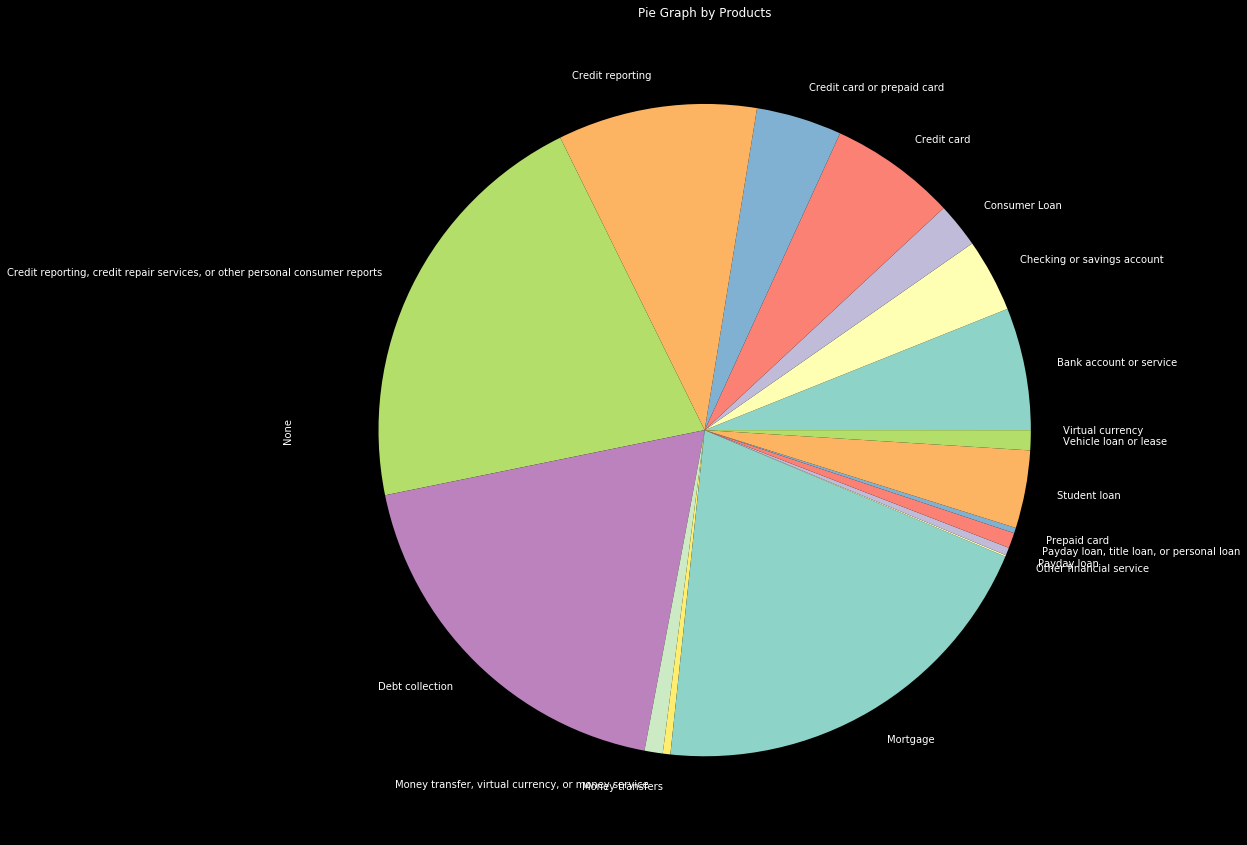

In [113]:
data.groupby('product').size().plot.pie(figsize=[15,15], title='Pie Graph by Products')

According to the pie graph above, the complaints mostly were concerned with credit reporting, credit repair services, or personal consumer reports, mortgage, or debt collection, respectively.  

In [114]:
company_group = data.groupby('company').count()
company_group= company_group.sort_values('company', ascending=True)
company_groupcsv = pd.DataFrame(company_group)
company_groupcsv.to_csv("company.csv", index=True)

In [118]:
#Q2: Complaints filed by each company: 
company_groupcsv.head(30)['issue']

company
(Former)Shapiro, Swertfeger & Hasty, LLP        11
1 STOP MONEY CENTERS, LLC                        5
10 Cent Title Pawn Inc                           2
1ST 2ND MORTGAGE CO. OF NJ INC                   2
1ST ALLIANCE LENDING, LLC                       23
1ST FINANCIAL, INC.                              4
1ST PREFERENCE MORTGAGE CORP                     2
1ST RESULTS BILLINGS & COLLECTIONS, INC.         3
1st Capital Finance of South Carolina, Inc.      3
1st Capital Mortgage, LLC                        1
1st Fidelity Loan Servicing                      3
1st Florida Lending CORP                         1
1st Franklin Financial Corporation             125
1st Maryland Mortgage Corporation                2
1st Midwest Mortgage Corp                        2
1st Money Center, Inc.                           4
1st Portfolio Holding Corporation                1
1st United Funding, LLC                          1
21ST MORTGAGE CORP.                            449
2233 Paradise Road LLC 

The table above showed how many complaints were filed against each company in the data. The full list can be found in the company.csv. For example, 21th Mortgage Corp. has received 449 complaints based on the data set. 

In [119]:
response_group = data.groupby(['company', "com_response_to_consumer"]).count()
response_groupcsv = pd.DataFrame(response_group)
response_groupcsv.to_csv('response.csv', index=True)

In [122]:
#Q3: The response by each company: 
response_groupcsv.head(30)['issue']

company                                      com_response_to_consumer       
(Former)Shapiro, Swertfeger & Hasty, LLP     Untimely response                   11
1 STOP MONEY CENTERS, LLC                    Closed with explanation              3
                                             Closed with monetary relief          1
                                             Closed with non-monetary relief      1
10 Cent Title Pawn Inc                       Closed with non-monetary relief      2
1ST 2ND MORTGAGE CO. OF NJ INC               Closed                               1
                                             Closed with explanation              1
1ST ALLIANCE LENDING, LLC                    Closed                               1
                                             Closed with explanation             21
                                             Closed with monetary relief          1
1ST FINANCIAL, INC.                          Closed with explanation              4

The table above showed the number of complaint responses that each company has made to the customers. For example, the 1st Alliance leading, LLC has closed 1 reponse, closed 21 responses with explanation, and closed 1 response with monetary relief. The detail list can be found in the response.csv. 

In [ ]:
#complete code: 
#Unit3 Individual Project 3
#Questions: 
# Which type product had the most complaints ordered by state?
# How many complaints have been filed for each company?
# Summarize the responses for each company. (i.e., 32 In Progress, 67 Closed, 22 Closed with Explanation).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Consumer_Complaints.csv")

data.head(5)
data.info()
data.columns
# #Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue','Consumer complaint narrative', 'Company public response', 'Company','State', 'ZIP code', 'Tags', 'Consumer consent provided?','Submitted via', 'Date sent to company', 'Company response to consumer','Timely response?', 'Consumer disputed?', 'Complaint ID'], dtype='object')

#change columns names
data.columns=['date_received', 'product', 'sub_product', 'issue', 'sub_issu', 'consumer_complaint_nar', 'company_pub_response', 'company', 'state', 'zip_code', 'tags', 'consumer_consent_provided', 'submitted_via', 'date_sent_to_com', 'com_response_to_consumer', 'timely_response', 'consumer_dis', 'complaint_id']

product_group= data.groupby(["state", "product"]).count()
product_group = product_group.sort_values(["state", "issue"], ascending=[True, False])
product_groupcsv = pd.DataFrame(product_group)
product_groupcsv.to_csv("product.csv", index=True)
#Q1: The product that had the most complaints sorted by the state are listed below: 
product_groupcsv.head(30)

data.groupby('product').size().plot.pie(figsize=[15,15], title='Pie Graph by Products', autopct='%1.1f%%')


company_group = data.groupby('company').count()
company_group= company_group.sort_values('company', ascending=True)
company_groupcsv = pd.DataFrame(company_group)
company_groupcsv.to_csv("company.csv", index=True)
#Q2: Complaints filed by each company: 
company_groupcsv.head(30)['issue']

response_group = data.groupby(['company', "com_response_to_consumer"]).count()
response_groupcsv = pd.DataFrame(response_group)
response_groupcsv.to_csv('response.csv', index=True)
#Q3: The response by each company: 
response_groupcsv.head(30)['issue']